In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

In [2]:
sns.set_style("whitegrid")

In [4]:
def compute_beta_measures(G):

    # COMPUTE LAMBDAS (OUT-DEGREE)
    lambdas = dict(G.out_degree())

    # COMPUTE BETA-MEASURES
    beta_measures = {}
    for target_node in list(G.nodes()):
        beta = 0
        predecessors = list(G.predecessors(target_node))

        for node in predecessors:
            beta += G.get_edge_data(node, target_node)["weight"] / lambdas[node]

        beta_measures[target_node] = beta

    return beta_measures



def make_summary_df(G):

    # GET IN-DEGREE STATS
    node_in_degrees = dict(G.in_degree(weight="weight"))
    in_degree_list = list(node_in_degrees.values())
    surfer_list = list(node_in_degrees.keys())

    # MAKE DATAFRAME
    df = pd.DataFrame({"surfer": surfer_list, "in-degree": in_degree_list})

    # ADD SEASONS COLUMN
    seasons_col = []
    for name in df["surfer"]:
        seasons_col.append(G.nodes[name]["seasons"])
    df["seasons"] = seasons_col

    # ADD EVENTS COLUMN
    events_col = []
    for name in df["surfer"]:
        events_col.append(G.nodes[name]["events"])
    df["events"] = events_col

    # ADD COLUMN FOR AVG IN-DEGREE PER EVENT
    df["deg_per_event"] = df["in-degree"] / df["events"]

    # ADD COLUMN FOR BETA MEASURES
    beta_dict = compute_beta_measures(G)
    beta_col = []
    for name in df["surfer"]:
        beta_col.append(beta_dict[name])
    df["beta"] = beta_col

    return df



def show_plots(df):

    # SHOW SEASONS HISTOGRAM
    sns.histplot(df["seasons"], bins=10, color="darkblue")
    plt.title("Distribution of Season Count", fontsize=18)
    plt.xlabel("Number of Seasons", fontsize=14)
    plt.ylabel("Surfer count", fontsize=14)
    plt.show(); plt.clf()

    # SHOW IN-DEGREE HISTOGRAM
    sns.histplot(df["in-degree"], bins=20, color="darkblue")
    plt.title("Distribution of In-degree", fontsize=18)
    plt.xlabel("In-degree", fontsize=14)
    plt.ylabel("Surfer count", fontsize=14)
    plt.show(); plt.clf()

    # SHOW BETA-MEASURE HISTOGRAM
    sns.histplot(df["beta"], bins=20, color="darkblue")
    plt.title("Distribution of Beta-measures", fontsize=18)
    plt.xlabel("Beta", fontsize=14)
    plt.ylabel("Surfer count", fontsize=14)
    plt.show(); plt.clf()

    # PLOT IN-DEGREE VS NUMBER OF EVENTS
    sns.scatterplot(x="events", y="in-degree", data=df, color="darkblue")
    plt.title("In-degree vs Number of Events ", fontsize=18)
    plt.xlabel("Number of events", fontsize=14)
    plt.ylabel("In-degree", fontsize=14)
    plt.show(); plt.clf()

    # PLOT BETA-MEASURE VS NUMBER OF EVENTS
    sns.scatterplot(x="events", y="beta", data=df, color="darkblue")
    plt.title("Beta-measure vs Number of Events ", fontsize=18)
    plt.xlabel("Number of events", fontsize=14)
    plt.ylabel("Beta", fontsize=14)
    plt.show(); plt.clf()

    # PLOT BETA VS AVG-DEGREE
    sns.scatterplot(x="deg_per_event", y="beta", data=df, color="darkblue", hue="events")
    plt.title("Beta-measure vs Avg. Degree per Event", fontsize=18)
    plt.xlabel("Avg. degree per event", fontsize=14)
    plt.ylabel("Beta", fontsize=14)
    plt.show(); plt.clf()

    # PLOT BETA VS IN-DEGREE
    sns.scatterplot(x="in-degree", y="beta", data=df, color="darkblue")
    plt.title("Beta-measure vs In-degree", fontsize=18)
    plt.xlabel("In-degree", fontsize=14)
    plt.ylabel("Beta", fontsize=14)
    plt.show(); plt.clf()


def sort_surfer_df(df, by_attribute="in-degree"):

    # ISOLATE TOP SURFERS BY IN-DEGREE
    df = df.sort_values(by=by_attribute, ascending=False)
    df.reset_index(inplace=True, drop=True)

    return df

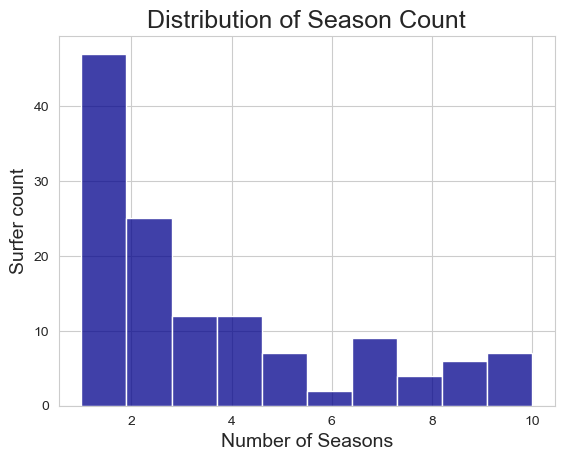

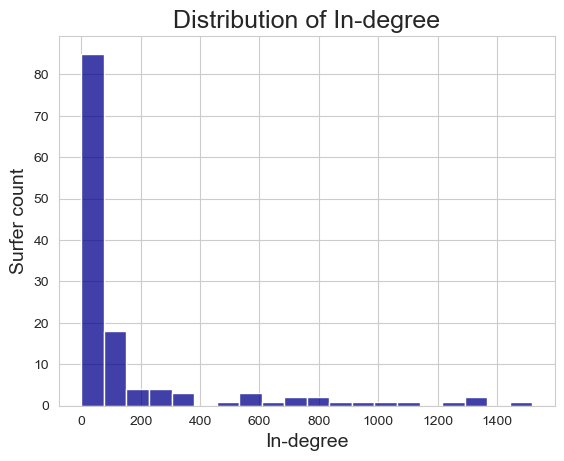

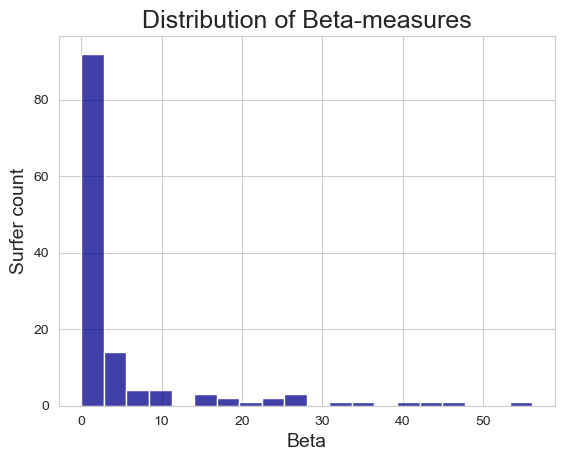

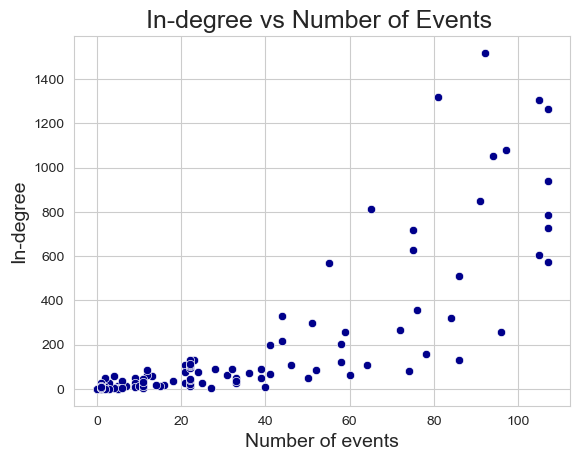

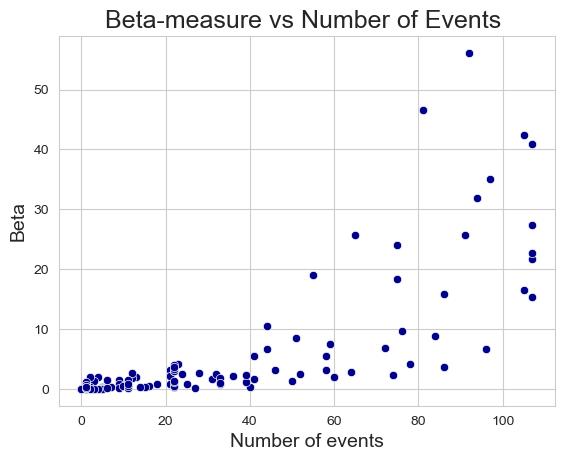

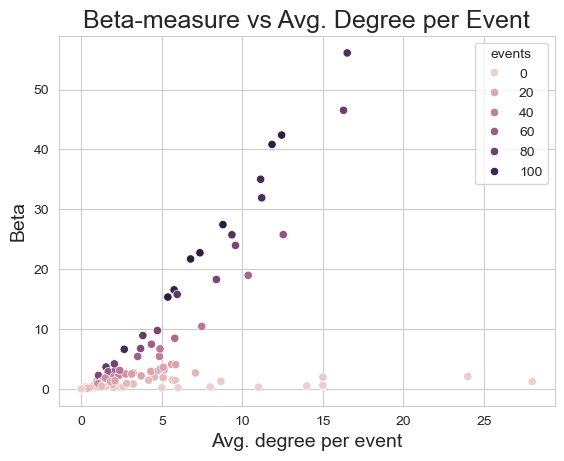

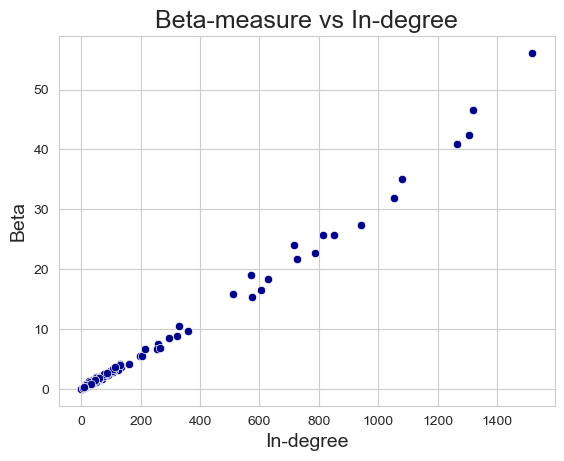

,surfer,in-degree,seasons,events,deg_per_event,beta
0,Gabriel Medina,1519,9,92,16.510870,56.134790
1,Mick Fanning,1319,9,81,16.283951,46.554578
2,Kelly Slater,1306,10,105,12.438095,42.413420
3,Jordy Smith,1267,10,107,11.841121,40.848069
4,Julian Wilson,1080,9,97,11.134021,35.028456
5,Joel Parkinson,1053,9,94,11.202128,31.928778
6,Adriano de Souza,941,10,107,8.794393,27.451532
7,Taj Burrow,815,7,65,12.538462,25.785654
8,John John Florence,851,9,91,9.351648,25.751529
9,Filipe Toledo,718,7,75,9.573333,23.976769


<Figure size 640x480 with 0 Axes>

In [5]:
net = nx.read_gml(f"../data/networks/overall_results_network.gml")

summary_df = make_summary_df(net)
show_plots(summary_df)

sorted_df = sort_surfer_df(summary_df, by_attribute="beta")
sorted_df.head(10)

In [6]:
num_short = len(summary_df[summary_df["seasons"] <= 2])
num_long = len(summary_df[summary_df["seasons"] > 2])

print(num_short, num_long)
print(num_short/len(summary_df))

72 59
0.549618320610687


In [7]:
num_low = len(summary_df[summary_df["in-degree"] <= 200])
num_high = len(summary_df[summary_df["in-degree"] > 200])

print(num_low, num_high)
print(num_low/len(summary_df))

105 26
0.8015267175572519


In [33]:
viz_df = sorted_df.head(10)

viz_df.rename(columns={
    "surfer": "Surfer",
    "in-degree": "In-degree",
    "seasons": "Num. Seasons",
    "events": "Num. Events",
    "deg_per_event": "Degree per Event",
    "beta": "Beta"
}, inplace=True)

viz_df.reset_index(inplace=True)
viz_df["index"] = viz_df["index"]+1
viz_df.rename(columns={"index": "Rank"}, inplace=True)
viz_df.to_csv("../data/tables/top_10_overall.csv", index=False)

viz_df.style

,Rank,Surfer,In-degree,Num. Seasons,Num. Events,Degree per Event,Beta
0,1,Gabriel Medina,1519,9,92,16.510870,56.134790
1,2,Mick Fanning,1319,9,81,16.283951,46.554578
2,3,Kelly Slater,1306,10,105,12.438095,42.413420
3,4,Jordy Smith,1267,10,107,11.841121,40.848069
4,5,Julian Wilson,1080,9,97,11.134021,35.028456
5,6,Joel Parkinson,1053,9,94,11.202128,31.928778
6,7,Adriano de Souza,941,10,107,8.794393,27.451532
7,8,Taj Burrow,815,7,65,12.538462,25.785654
8,9,John John Florence,851,9,91,9.351648,25.751529
9,10,Filipe Toledo,718,7,75,9.573333,23.976769


## Analyze overall network of top surfers by in-degree

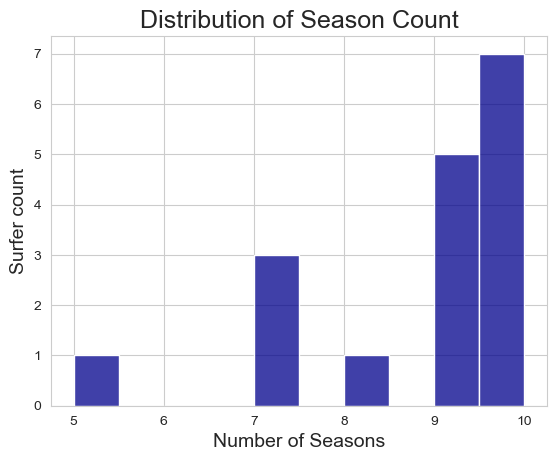

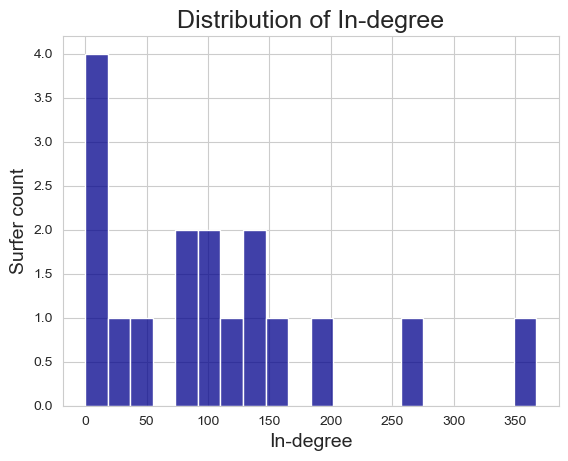

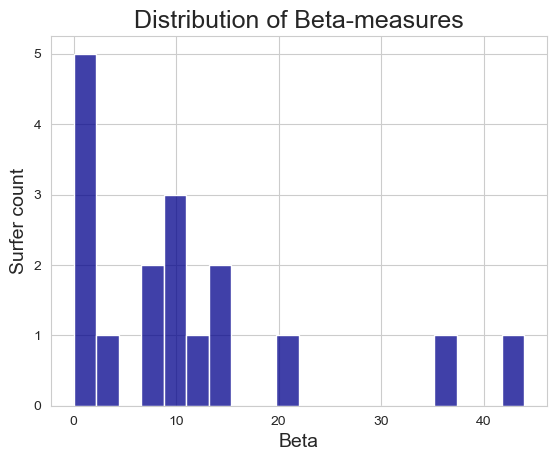

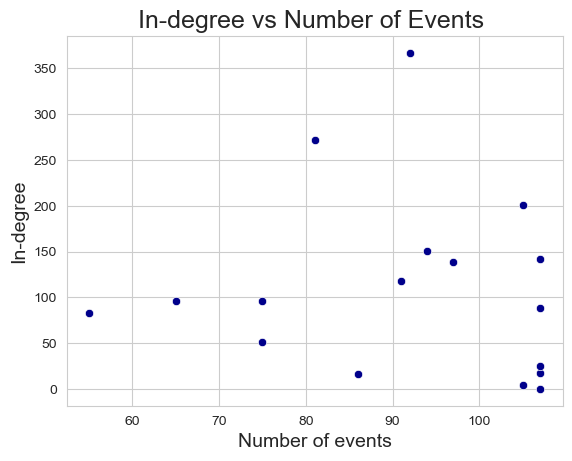

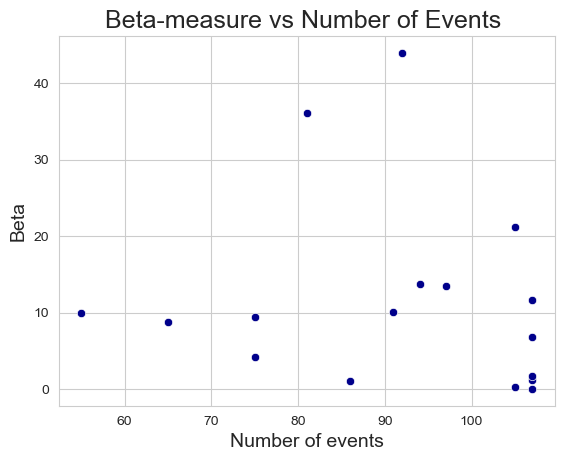

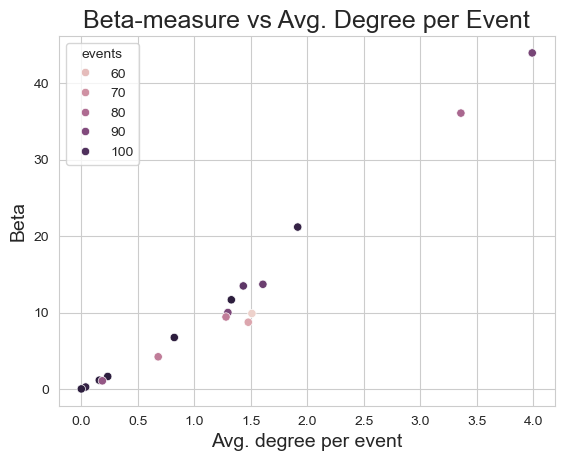

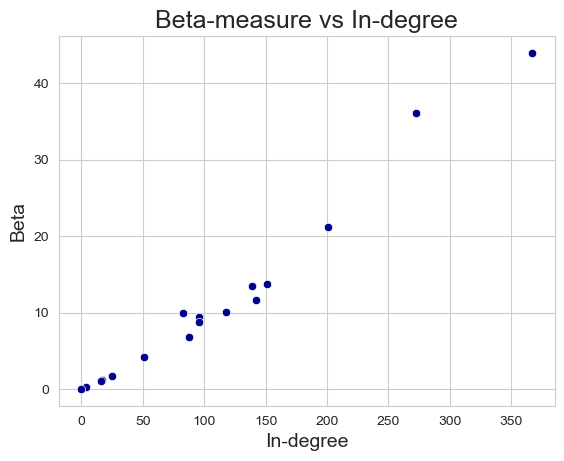

131 17
0.1297709923664122


<Figure size 640x480 with 0 Axes>

In [37]:
filtered_df = summary_df[summary_df["in-degree"] > 400]
filtered_nodes = list(filtered_df["surfer"])
filtered_net = net.subgraph(filtered_nodes)

filtered_summary_df = make_summary_df(filtered_net)
show_plots(filtered_summary_df)

filt_top_df = sort_surfer_df(filtered_summary_df, by_attribute="beta")
filt_top_df

print(len(summary_df), len(filtered_df))
print(len(filtered_df)/len(summary_df))

# nx.write_gml(filtered_net, "../filtered_networks/top_surfer_network.gml")

In [38]:
viz_df = filt_top_df.head(10)

viz_df.rename(columns={
    "surfer": "Surfer",
    "in-degree": "In-degree",
    "seasons": "Num. Seasons",
    "events": "Num. Events",
    "deg_per_event": "Degree per Event",
    "beta": "Beta"
}, inplace=True)

viz_df.reset_index(inplace=True)
viz_df["index"] = viz_df["index"]+1
viz_df.rename(columns={"index": "Rank"}, inplace=True)
viz_df.to_csv("../data/tables/top_10_filtered.csv", index=False)

viz_df.style

,Rank,Surfer,In-degree,Num. Seasons,Num. Events,Degree per Event,Beta
0,1,Gabriel Medina,367,9,92,3.989130,43.967720
1,2,Mick Fanning,272,9,81,3.358025,36.093910
2,3,Kelly Slater,201,10,105,1.914286,21.182387
3,4,Joel Parkinson,151,9,94,1.606383,13.692476
4,5,Julian Wilson,139,9,97,1.432990,13.477595
5,6,Jordy Smith,142,10,107,1.327103,11.662912
6,7,John John Florence,118,9,91,1.296703,10.001068
7,8,Italo Ferreira,83,5,55,1.509091,9.873397
8,9,Filipe Toledo,96,7,75,1.280000,9.416957
9,10,Taj Burrow,96,7,65,1.476923,8.731670
